In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from scipy.ndimage import gaussian_filter
import sys
from tqdm import tqdm
from functools import partial
import acd
from copy import deepcopy
sys.path.append('..')
sys.path.append('../..')
from transforms_torch import bandpass_filter
# plt.style.use('dark_background')
sys.path.append('../../dsets/mnist')
import dset
from model import Net, Net2c
from util import *
from numpy.fft import *
from torch import nn
from style import *
import pickle as pkl
from torchvision import datasets, transforms
from sklearn.decomposition import NMF
import transform_wrappers
import visualize as viz
from model import Net, Net2c
torch.manual_seed(42)
np.random.seed(42)
from os.path import join as oj
out_dir = '/scratch/users/vision/chandan/transform_interp/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
cd_nmf = pkl.load(open(oj(out_dir, 'cd_nmf.pkl'), 'rb'))
baselines_nmf = pkl.load(open(oj(out_dir, 'baselines_nmf.pkl'), 'rb'))
scores_dict = {**cd_nmf, **baselines_nmf}

In [34]:
keys = sorted(scores_dict.keys())
accs = []
for key in keys:
    num_correct_total = 0
    num_total = 0
    for basis_num in range(30):
        scores = scores_dict[key][basis_num]
        basis_pred = scores.argmax(axis=1)
        num_correct = np.sum(basis_pred == basis_num)
        num_correct_total += num_correct
        num_total += scores.shape[0]
    acc = num_correct_total / num_total
    print(f'{key}\tacc {acc:0.2f}')
    accs.append(acc)

acd	acc 0.69
cd	acc 0.82
dot_product	acc 0.82
gradient_shap	acc 0.91
ig	acc 0.95
input_x_gradient	acc 0.80
saliency	acc 0.72


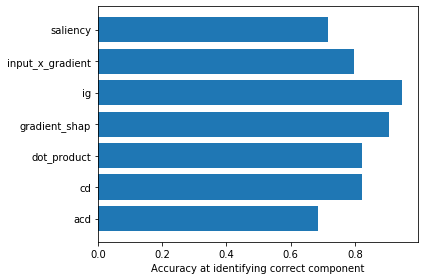

In [42]:
plt.barh(keys, accs)
plt.xlabel('Accuracy at identifying correct component')
plt.tight_layout()
plt.savefig('fig_nmf_comp.pdf')
plt.show()